In [1]:
from simulation import polymer
from distributionComparison import minMaxNorm, medianFoldNorm
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Model function landscape fixing all parameters except one
compareDist = medianFoldNorm('Data/polymer_20k.xlsx', polymer)
step = 0.01
runs = []
bounds = np.array([[900,1100],[90000,110000],[30000000,32000000],
                   [0,1],[0,0.0001],[0,1],[0,1],[0,1],[0,1],[1,1]])
X =  np.random.uniform(bounds[:,0],bounds[:,1],bounds.shape[0])

for _ in range(5):
    y_l = []
    for val in np.arange(0,1+step,step):
        X[9] = val
        y_l.append(compareDist.costFunction(X, plot=False))
    runs.append(y_l)


In [72]:
np.save(file='Results/runs1_3_0point01_5', arr=runs)

array([1.02869827e+03, 1.09917327e+05, 2.43569762e+07, 1.00000000e+00,
       6.91068964e-06, 5.17196428e-01, 6.62383638e-01, 2.95357382e-02,
       7.95432577e-01, 1.00000000e+00])

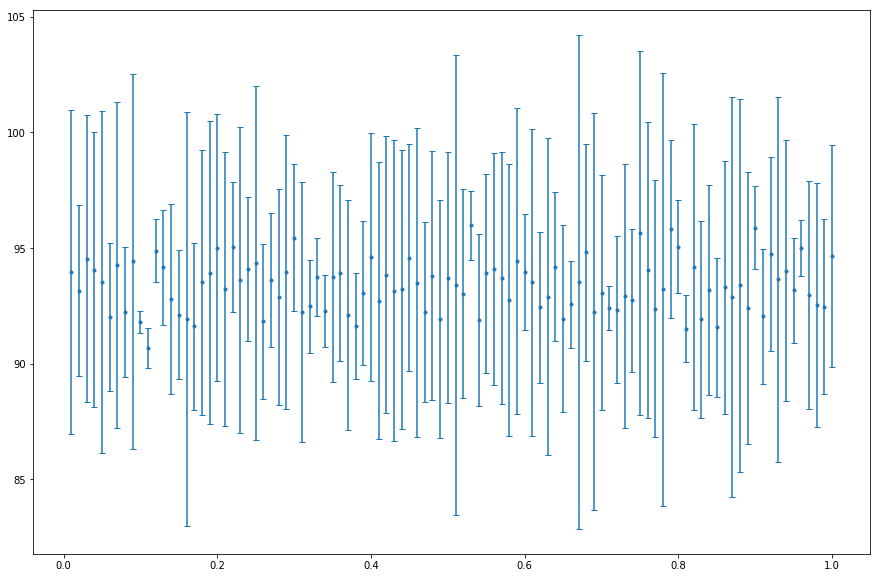

In [17]:
#Plot mean and var of .. runs
runs = np.array(runs)
y_mean = runs.mean(axis=0)
y_var = runs.var(axis=0)
x = np.arange(0,1+step,step)
# plt.plot(x, y_mean)
plt.figure(figsize=(15,10))
plt.errorbar(x[1:], y_mean[1:], y_var[1:], linestyle='None', marker='.',capsize=3 )
plt.savefig('Smoothness/figures/errorbars1_9_0point01_5')